In [1]:
import numpy as np
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
from bluepysnap import Circuit
from bluepysnap.bbp import Cell

CircuitPath = 'O1_data_physiology/' # edges files not inclued in https://github.com/FernandoSBorges/
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["S1nonbarrel_neurons"]
nodesinfo = cells.get()

# NetPyNE

In [2]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [3]:
cellName_list = {}
cellName_list2 = []
gid_list = {}

Epops = []
Ipops = []

cellName_list2 = []

# for gid in [108767, 141766, 138433, 139867, 141213, 141369, 133426, 135956, 137858, 114264, 114284, 115007]: 
# for gid in [108767, 141766, 138433, 141213, 133426, 135956,  137858, 114264]: 
for gid in [129252]: 
# for gid in [118008, 118052, 118445, 118551, 118903, 119782, 120403, 121387, 122954, 123320, 123553, 125451, 125547, 127227, 127289, 129252, 130055, 130094, 130103, 130190, 130206, 130325, 131332, 131667, 131862, 132504, 132706, 133289, 133293, 133426, 133580, 134949, 135332, 135956, 137561, 137858]: 

    cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid]
        
    cellName_list2.append(cellName)
    
    cellName_list[gid] = cellName + '_' + str(len(cellName_list2)-1)
    gid_list[cellName + '_' + str(len(cellName_list2)-1)] = gid
    
    print('%s %s %s 1 1 %s %d' % (cellName + '_' + str(len(cellName_list2)-1),nodesinfo['mtype'][gid],nodesinfo['etype'][gid],nodesinfo['morphology'][gid],gid))

    if 'cADpyr' in cellName:
        Epops.append(cellName + '_' + str(len(cellName_list2)-1))
    else:
        Ipops.append(cellName + '_' + str(len(cellName_list2)-1))

L4_TPC_cADpyr_0 L4_TPC cADpyr 1 1 dend-mtC050800E_idD_axon-sm100429a1-5_INT_idD_-_Scale_x1.000_y1.050_z1.000_-_Clone_0 129252


In [4]:
cellsList = {}

for cellName in gid_list.keys():
    # try:    
        gid = gid_list[cellName]

        MorphoName = nodesinfo['morphology'][gid] + '.asc'

        hocName = nodesinfo['model_template'][gid][4:]  

        MorphologyPath = 'O1_data_physiology/morphologies/ascii'
        
        # MorphoName = nodesinfo['morphology'][gid]+"_gid"+str(gid)+".asc"

        print(cellName,hocName)
            
        cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=True,
            conds={'cellType': cellName, 'cellModel': 'HH_full'},
            fileName='O1_data_physiology/emodels_hoc/' + hocName + '.hoc',
            cellName=hocName,
            cellInstance = False,
            cellArgs=[gid, MorphologyPath, MorphoName])
        
        # netParams.saveCellParamsRule(label=cellName, fileName=cellName+'_BBP_cellParams.json')


        # netParams.cellParams[cellName]['secs']['axon_0']['geom']['Ra'] = 2.0*netParams.cellParams[cellName]['secs']['axon_0']['geom']['Ra']

        cellsList[cellName] = [{'x': nodesinfo['x'][gid], 'y': nodesinfo['y'][gid], 'z': nodesinfo['z'][gid]}]
        # cellsList[cellName] = [{'x': nodesinfo['x'][gid] - 3000.0, 'y': nodesinfo['y'][gid] + 2000.0, 'z': nodesinfo['z'][gid] + 3500.0}]

        cellMe = cellName

        axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellMe]['secs']['soma_0']['geom']['pt3d'][-1]

        netParams.cellParams[cellMe]['secs']['axon_0']['geom']['diam'] = 1.0
        # netParams.cellParams[cellMe]['secs']['axon_0']['geom']['L'] = 30.0

        axon_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['diam']
        axon_pt3d_L =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['L']

        netParams.cellParams[cellMe]['secs']['axon_0']['geom']['pt3d'] = [(axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L/2.0, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L, axon_pt3d_z, axon_pt3d_diam)]



        axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon_0_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['pt3d'][-1]

        # netParams.cellParams[cellMe]['secs']['axon_1']['geom']['diam'] = 0.5
        # netParams.cellParams[cellMe]['secs']['axon_1']['geom']['L'] = 30.0

        axon1_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['diam']
        axon1_pt3d_L =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['L']

        netParams.cellParams[cellMe]['secs']['axon_1']['geom']['pt3d'] = [(axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L/2.0, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L, axon1_pt3d_z, axon1_pt3d_diam)] 


                    
        myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, axon_1_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['pt3d'][-1]

        # netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['diam'] = 0.5
        netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['L'] = 100.0

        myelin_pt3d_diam =  netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['diam']
        myelin_pt3d_L =  netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['L']

        netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['pt3d'] = [(myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L/2.0, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L, myelin_pt3d_z, myelin_pt3d_diam)] 

    # except:
    #     pass        

# cellsList

L4_TPC_cADpyr_0 cADpyr_L4TPC


In [5]:
# https://github.com/suny-downstate-medical-center/S1_mouse
# Layer	     height	  from	  to
# L1         0.089      0.000	0.089
# L2         0.070      0.089	0.159
# L3         0.128      0.159	0.286
# L4         0.134      0.286	0.421
# L5         0.263      0.421	0.684
# L6         0.316      0.684	1.000			 
# L23        0.198      0.089	0.286
# All     1378.8 um

layer = {'1':[0.0, 0.089], '2': [0.089,0.159], '3': [0.159,0.286], '23': [0.089,0.286], '4':[0.286,0.421], '5': [0.421,0.684], '6': [0.684,1.0], 
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries

#Th pop
ymin={'ss_RTN_o': 1688, 'ss_RTN_m': 1766, 'ss_RTN_i': 1844, 'VPL_sTC': 2000, 'VPM_sTC': 2156, 'POm_sTC_s1': 2312}
ymax={'ss_RTN_o': 1766, 'ss_RTN_m': 1844, 'ss_RTN_i': 2000, 'VPL_sTC': 2156, 'VPM_sTC': 2312, 'POm_sTC_s1': 2624}

#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 50.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 1378.8 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 50.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume
netParams.rotateCellsRandomly = True
   
netParams.defaultThreshold = -20.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)
    
#------------------------------------------------------------------------------
# load data from S1 Raster
#------------------------------------------------------------------------------
for metype in netParams.cellParams.keys():        
    layernumber = metype[1:2]
    if layernumber == '2':
        netParams.popParams[metype] = {'cellType': metype, 'cellModel': 'HH_full', 'ynormRange': layer['23'], 
                                            'numCells':20, 'diversity': True}
    else:
        netParams.popParams[metype] = {'cellType': metype, 'cellModel': 'HH_full', 'ynormRange': layer[layernumber], 
                                            'numCells': 20, 'diversity': True}

In [6]:
netParams.popParams.keys()

odict_keys(['L4_TPC_cADpyr_0'])

In [7]:
#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration

cfg.coreneuron = False

#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 0.60*1e3 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'cell': 4321, 'conn': 4321, 'stim': 1000, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -84.0}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
cfg.recordCells = list(netParams.popParams.keys())
# cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'}}  ## Dict with traces to record  
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    'V_axon_1': {'sec':'axon_1', 'loc':0.5, 'var':'v'},
                    # 'V_myelin_0': {'sec':'myelin_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_15': {'sec':'axon_15', 'loc':0.5, 'var':'v'},
                    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    # 'V_apic_7': {'sec':'apic_7', 'loc':0.5, 'var':'v'},       
                    # 'V_apic_64': {'sec':'apic_64', 'loc':0.5, 'var':'v'},
                    # 'V_apic_86': {'sec':'apic_86', 'loc':0.5, 'var':'v'},           
                    # 'V_dend_0': {'sec':'dend_0', 'loc':0.5, 'var':'v'},       
                    # 'V_dend_5': {'sec':'dend_5', 'loc':0.5, 'var':'v'},
                    }
cfg.recordStim = False			
cfg.recordTime = False  		
cfg.recordStep = 0.025       

# cfg.saveLFPPops =  cfg.recordCells 

# cfg.recordLFP = [[x, y, 15] for y in [400, 500, 600] for x in [0, 15, 30]] # 1 elec in L1 and 3 elec in L5  
cfg.recordLFP = [[x, y, 250] for y in [400, 500, 600] for x in [-200, 50, 300]] # 1 elec in L1 and 3 elec in L5  

#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'v0_batch0'       #   + str(cfg.cynradNumber)
cfg.saveFolder = 'exploration/data/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False	        	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simData', 'simConfig', 'net', 'netParams'] ## ['simData'] ##  ['simData'] ##, , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			
cfg.saveCellConns = True	

#------------------------------------------------------------------------------
# Analysis and plotting 
# ------------------------------------------------------------------------------
# cfg.analysis['plotRaster'] = {'include': cfg.S1cells, 'saveFig': True, 'showFig': False,'orderInverse': True, 'timeRange': [0,cfg.duration], 'figSize': (24,8), 'fontSize':4, 'markerSize':4, 'marker': 'o', 'dpi': 300} 
# cfg.analysis['plot2Dnet']   = {'include': ['presyn_L23_PC_cAD','presyn_L5_TTPC2_cAD', 'presyn_VPM_sTC','L23_PC_cAD','L5_TTPC2_cAD'],'saveFig': True, 'showConns': False, 'figSize': (24,24), 'view': 'xz', 'fontSize':16}   # Plot 2D cells xy
# cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'ylim': [-100,50], 'saveFig': True, 'showFig': False, 'figSize':(24,24)}

cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'saveFig': False, 'showFig': True, 'figSize':(24,4)} # , 'ylim': [-90,30] Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre':  [ii for ii in range(10)],'includePre':  [ii for ii in range(10)], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}

cfg.recordLFP

[[-200, 400, 250],
 [50, 400, 250],
 [300, 400, 250],
 [-200, 500, 250],
 [50, 500, 250],
 [300, 500, 250],
 [-200, 600, 250],
 [50, 600, 250],
 [300, 600, 250]]

In [8]:
#------------------------------------------------------------------------------  
# Thalamic Cells

cfg.cellNumber = {}
cfg.popLabel = {}
cfg.popNumber = {}
 
cfg.thalamicpops = ['VPM_sTC']
cfg.cellNumber['VPM_sTC'] = 200 # 839

for mtype in cfg.thalamicpops: # No diversity
	metype = mtype
	cfg.popLabel[metype] = mtype
	cfg.popNumber[mtype] = cfg.cellNumber[metype]

## Th->S1
cfg.connect_ThVecStim_S1 = True
cfg.TC_S1 = {}
cfg.TC_S1['VPM_sTC'] = True
cfg.TC_S1_weightE = 0.00015
cfg.TC_S1_weightI = 0.00025

# homogeneous_poisson at 3Hz cos wave and FR~30Hz
cfg.tmin = 500
cfg.tdur = 40
cfg.max_rate = 100.00
cfg.f_osc = 0.01
cfg.bin_size = 0.05

# Th
netParams.synMechParams['NMDA_Th']             = {'mod': 'MyExp2SynNMDABB',    'tau1NMDA': 15, 'tau2NMDA': 150,                'e': 0}
netParams.synMechParams['AMPA_Th']             = {'mod': 'MyExp2SynBB',        'tau1': 0.05,   'tau2': 5.3, 'e': 0}
netParams.synMechParams['GABAB_Th']            = {'mod': 'MyExp2SynBB',        'tau1': 3.5,    'tau2': 260.9,                  'e': -93} 
netParams.synMechParams['GABAA_Th']            = {'mod': 'MyExp2SynBB',        'tau1': 0.07,   'tau2': 18.2,                   'e': -80}
ESynMech_Th = ['AMPA_Th', 'NMDA_Th']

#------------------------------------------------------------------------------
# ThVecStim->S1 connectivity parameters
#------------------------------------------------------------------------------
time = np.arange(0, cfg.tdur, 1)
rate = cfg.max_rate * (np.cos(2*np.pi*cfg.f_osc*time)+1)/2

allspikes = []

def inhomogeneous_poisson(rate, bin_size):
    n_bins = len(rate)
    spikes = np.random.rand(n_bins) < rate * bin_size
    spike_times = cfg.tmin + np.nonzero(spikes)[0] * bin_size
    # print(spike_times)
    for spkk in spike_times[:1]:
        allspikes.append(spkk)
    return spike_times

# print(cfg.thalamicpops)
# create 1 vectstim pop per cell gid
for metype in cfg.thalamicpops: # metype

    # print(metype, cfg.cellNumber[metype])
    
    cellsList = []            
    for cellLabel in range(cfg.cellNumber[metype]): # all cells in metype
        spike_times = inhomogeneous_poisson(rate, cfg.bin_size)
        cellsList.append({'cellLabel': cellLabel, 'spkTimes': [1, spike_times[0]]})
        # cellsList.append({'cellLabel': cellLabel, 'spkTimes': list(spike_times[:1])})
        # print(cellLabel, spike_times[::3])
        
    if np.size(cellsList) > 0:
        netParams.popParams[metype] = {'cellModel': 'VecStim', 'cellsList': cellsList}        


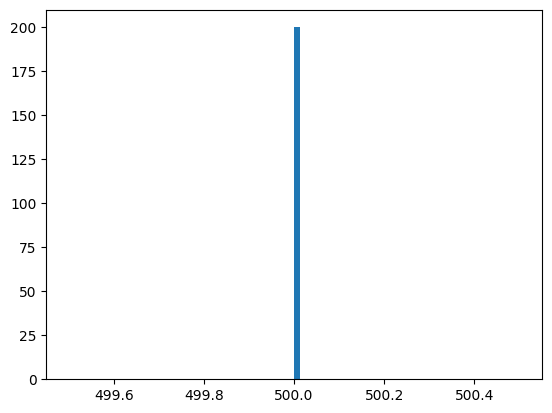

In [9]:
plt.hist(allspikes, bins=80);

In [10]:

if cfg.connect_ThVecStim_S1:

    # for post in Epops: 
    #     convergence_Th_S1['VPM_sTC']['L4_PC'] = 197
    #     convergence_Th_S1['VPM_sTC']['L4_SP'] = 197
    #     convergence_Th_S1['VPM_sTC']['L4_SS'] = 188
    #     convergence_Th_S1['VPM_sTC']['L4_INH'] = 116

    ## Connectivity rules
    synapsesperconnection_Th_S1 = 9.0
    for pre in ['VPM_sTC']:  #  
        if cfg.TC_S1[pre]:
            for post in Epops: 
                
                if 'L4_SS' in post:
                    conn_convergence = np.ceil(188/synapsesperconnection_Th_S1)
                else:
                    conn_convergence = np.ceil(197/synapsesperconnection_Th_S1)

                netParams.connParams['thal_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre},  ####################################################
                    'postConds': {'pop': post},
                    'weight': 0.0002,   # synaptic weight 
                    'sec': 'all', # target postsyn section
                    'delay': 'defaultDelay',
                    'synsPerConn': int(synapsesperconnection_Th_S1),                     
                    'synMech': ESynMech_Th}  

                netParams.connParams['thal_'+pre+'_'+post]['convergence'] = conn_convergence 

                if 'L4_UPC' in post:
                    netParams.connParams['thal_'+pre+'_'+post]['weight'] = 0.0002

                if 'L4_TPC' in post:
                    netParams.connParams['thal_'+pre+'_'+post]['weight'] = 0.0005

            for post in Ipops: 
                
                conn_convergence = np.ceil(116/synapsesperconnection_Th_S1)

                netParams.connParams['thal_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre},  ####################################################
                    'postConds': {'pop': post},
                    'weight': cfg.TC_S1_weightI,   # synaptic weight 
                    'sec': 'somatic', # target postsyn section
                    'delay': 'defaultDelay',
                    'synsPerConn': int(synapsesperconnection_Th_S1),                     
                    'synMech': ESynMech_Th}  

                netParams.connParams['thal_'+pre+'_'+post]['convergence'] = conn_convergence 

In [11]:
#------------------------------------------------------------------------------
# NetStim inputs to simulate Spontaneous synapses + background in S1 neurons - data from Rat
#------------------------------------------------------------------------------
# Spont and BG
netParams.synMechParams['AMPA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 1.74, 'e': 0}
netParams.synMechParams['NMDA'] = {'mod': 'MyExp2SynNMDABB', 'tau1NMDA': 0.29, 'tau2NMDA': 43, 'e': 0}
netParams.synMechParams['GABAA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 8.3, 'e': -80}
netParams.synMechParams['GABAB'] = {'mod':'MyExp2SynBB', 'tau1': 3.5, 'tau2': 260.9, 'e': -93} 
ESynMech = ['AMPA', 'NMDA']
ISynMech = ['GABAA', 'GABAB']

cfg.addStimSynS1 = True
cfg.Ipops = Ipops
cfg.Epops = Epops
cfg.rateStimI = 50.0 # Hz
cfg.rateStimE = 20.0
SourcesNumber = 10 # for each post Mtype - sec distribution

if cfg.addStimSynS1:      
    for post in cfg.Ipops + cfg.Epops:

        synperNeuron = 10
        ratespontaneous = cfg.rateStimI
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_INH->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}

        synperNeuron = 10
        ratespontaneous = cfg.rateStimE
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_EXC->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}
            
    #------------------------------------------------------------------------------
    for post in cfg.Epops+cfg.Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum), 
                'synMech': 'AMPA', 
                'conds': {'cellType': post}, 
                'sec': 'all', 
                'weight': 0.5,
                'delay': 0.1}

    for post in cfg.Epops+cfg.Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_INH->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_INH->' + post + '_' + str(qSnum), 
                'conds': {'cellType': post}, 
                'synMech': 'GABAA', 
                'sec': 'all', 
                'weight': 0.5,
                'delay': 0.1}


In [12]:
print(netParams.connParams.keys())

odict_keys(['thal_VPM_sTC_L4_TPC_cADpyr_0'])


In [13]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.runSim()                      			# run parallel Neuron simulation  


Start time:  2025-04-01 17:51:58.204745

Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 220 
  Done; cell creation time = 0.71 s.
Making connections...
  Number of connections on node 0: 440 
  Number of synaptic contacts on node 0: 7920 
  Done; cell connection time = 0.52 s.
Adding stims...
  Number of stims on node 0: 400 
  Done; cell stims creation time = 0.07 s.
Recording 40 traces of 2 types on node 0
0.0s

Running simulation using NEURON for 600.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
  Done; run time = 350.42 s; real-time ratio: 0.00.


In [14]:
#   Number of connections on node 0: 770 
#   Number of synaptic contacts on node 0: 21235 

In [15]:
sim.gatherData();                  			# gather spiking data and cell info from each node
# sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
# sim.analysis.plotData()         			# plot spike raster etc
# sim.analysis.plotSpikeStats(timeRange=[300,900], figSize=(18,6))


Gathering data...
  Done; gather time = 0.53 s.

Analyzing...
  Cells: 220
  Connections: 460 (2.09 per cell)
  Synaptic contacts: 8320 (37.82 per cell)
  Spikes: 575 (4.36 Hz)
  Simulated time: 0.6 s; 1 workers
  Run time: 350.42 s
   L4_TPC_cADpyr_0 : 14.583 Hz
   VPM_sTC : 3.333 Hz


In [16]:
# for j in range(6):
#     sim.analysis.plotTraces(include= [ii for ii in range(5*j,5*j+5,1)], timeRange=[400,500], axis=False, overlay=True, oneFigPer='trace', figSize=(15,2.1));

Preparing spike data...
Plotting raster...


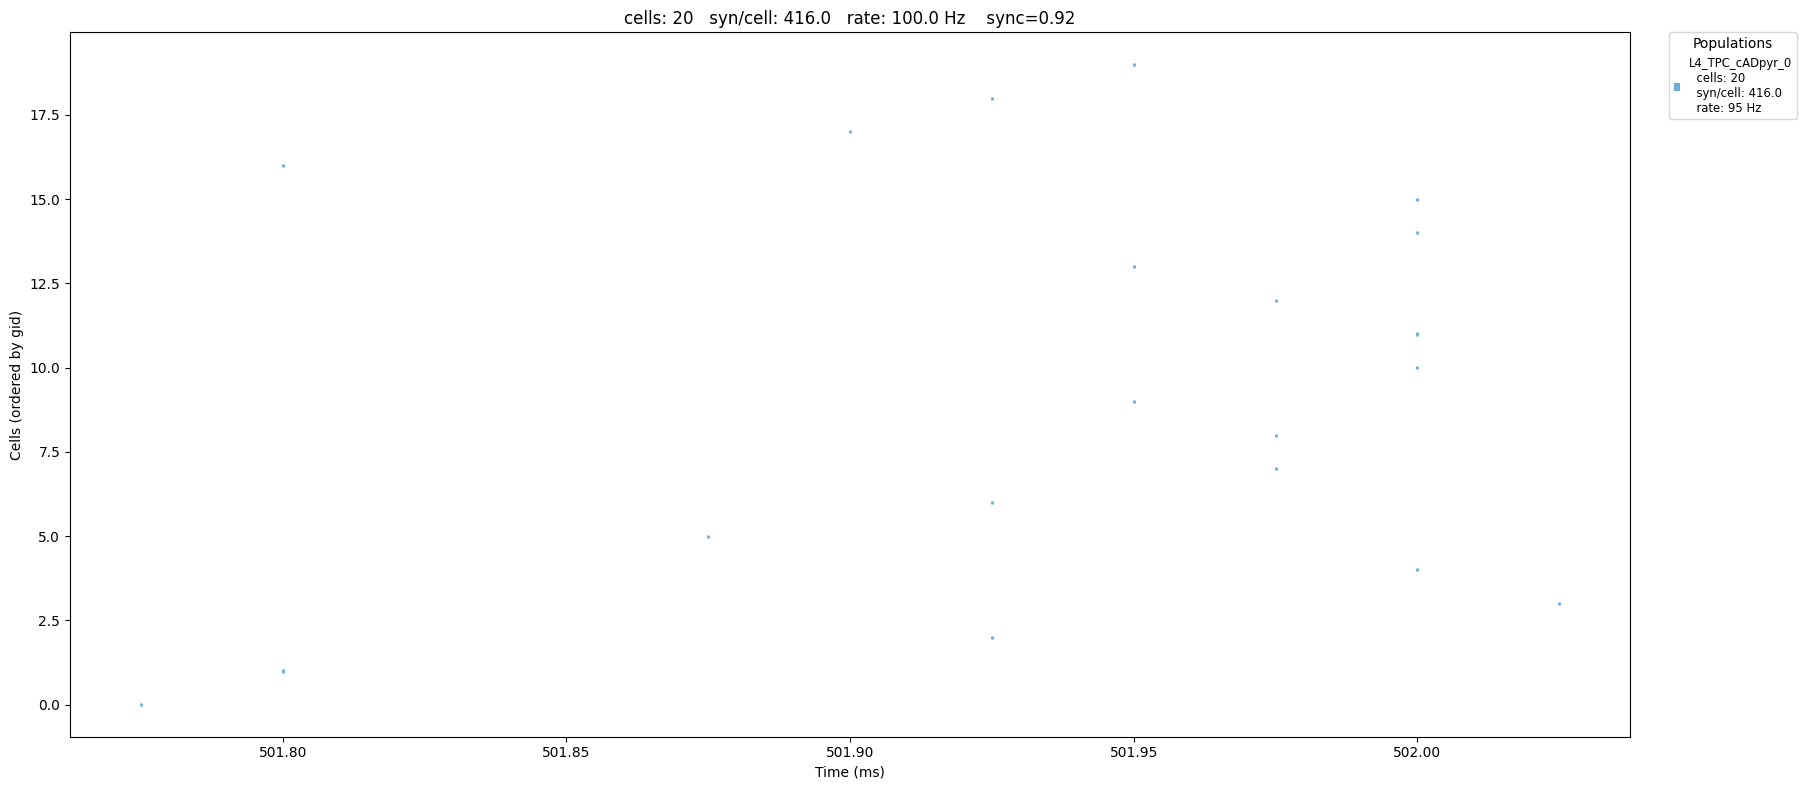

In [17]:
sim.analysis.plotRaster(include=Epops+Ipops, timeRange=[500,510], figSize=(18,8), popRates=True);

Plotting recorded cell traces ... trace


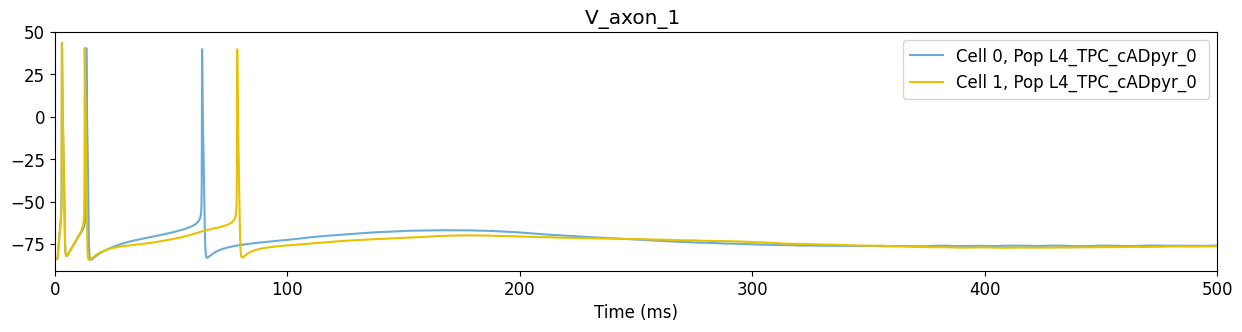

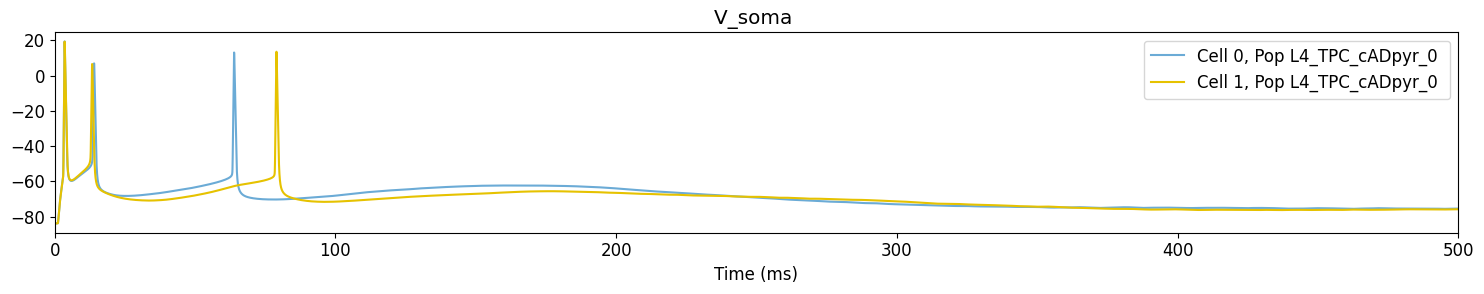

Plotting recorded cell traces ... trace


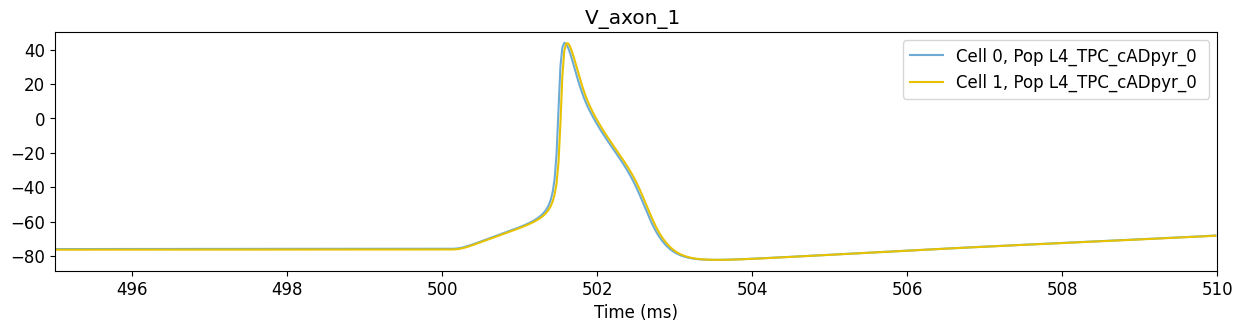

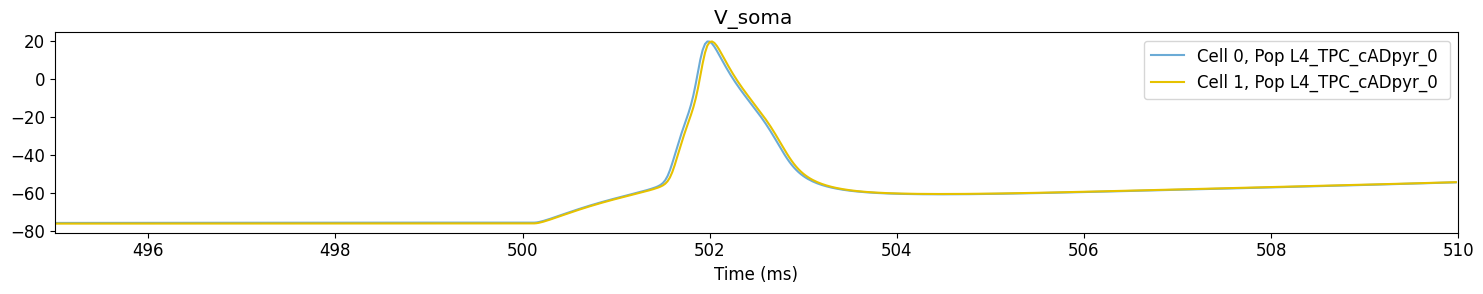

In [18]:
sim.analysis.plotTraces(include= [ii for ii in range(2)], timeRange=[0,500], axis=True, overlay=True, oneFigPer='trace', figSize=(15,3.1));
sim.analysis.plotTraces(include= [ii for ii in range(2)], timeRange=[495,510], axis=True, overlay=True, oneFigPer='trace', figSize=(15,3.1));

Plotting recorded cell traces ... cell


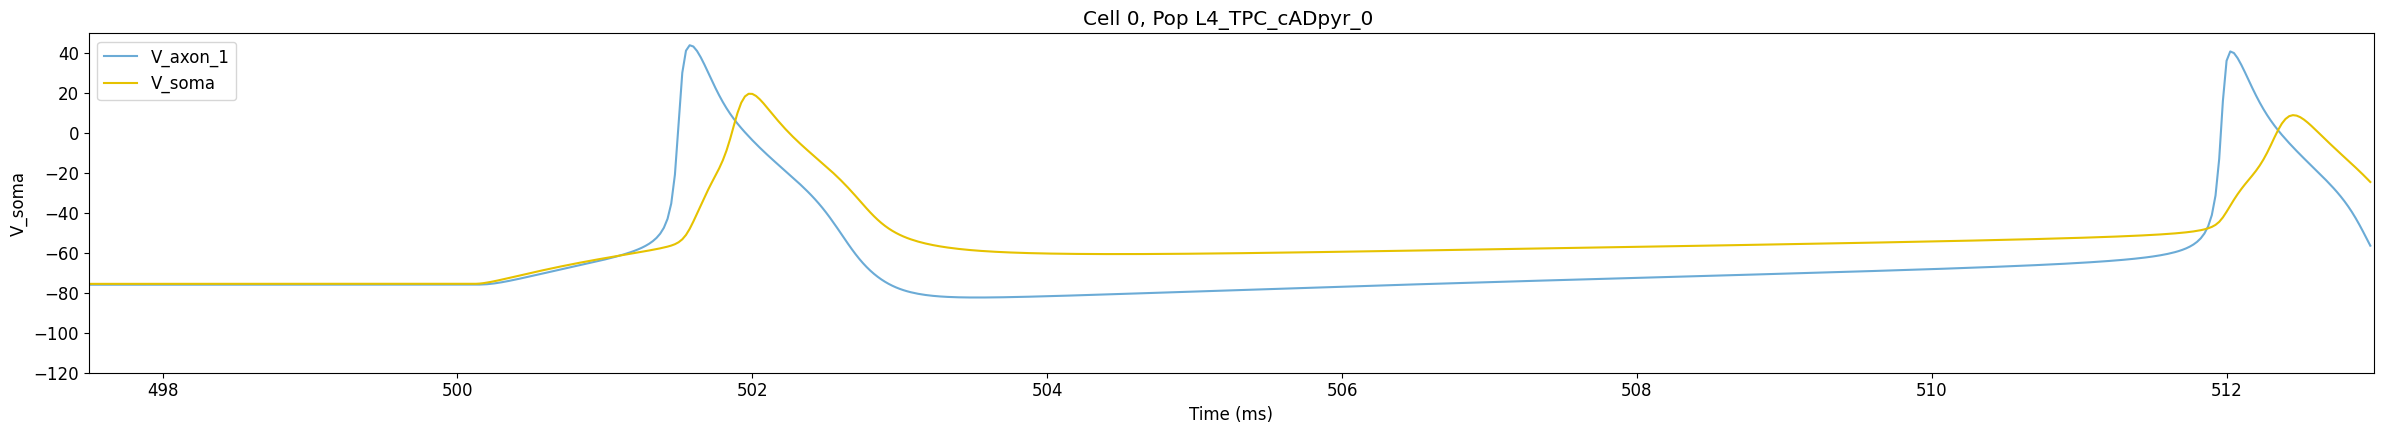

Preparing LFP data...
Plotting LFP time series...


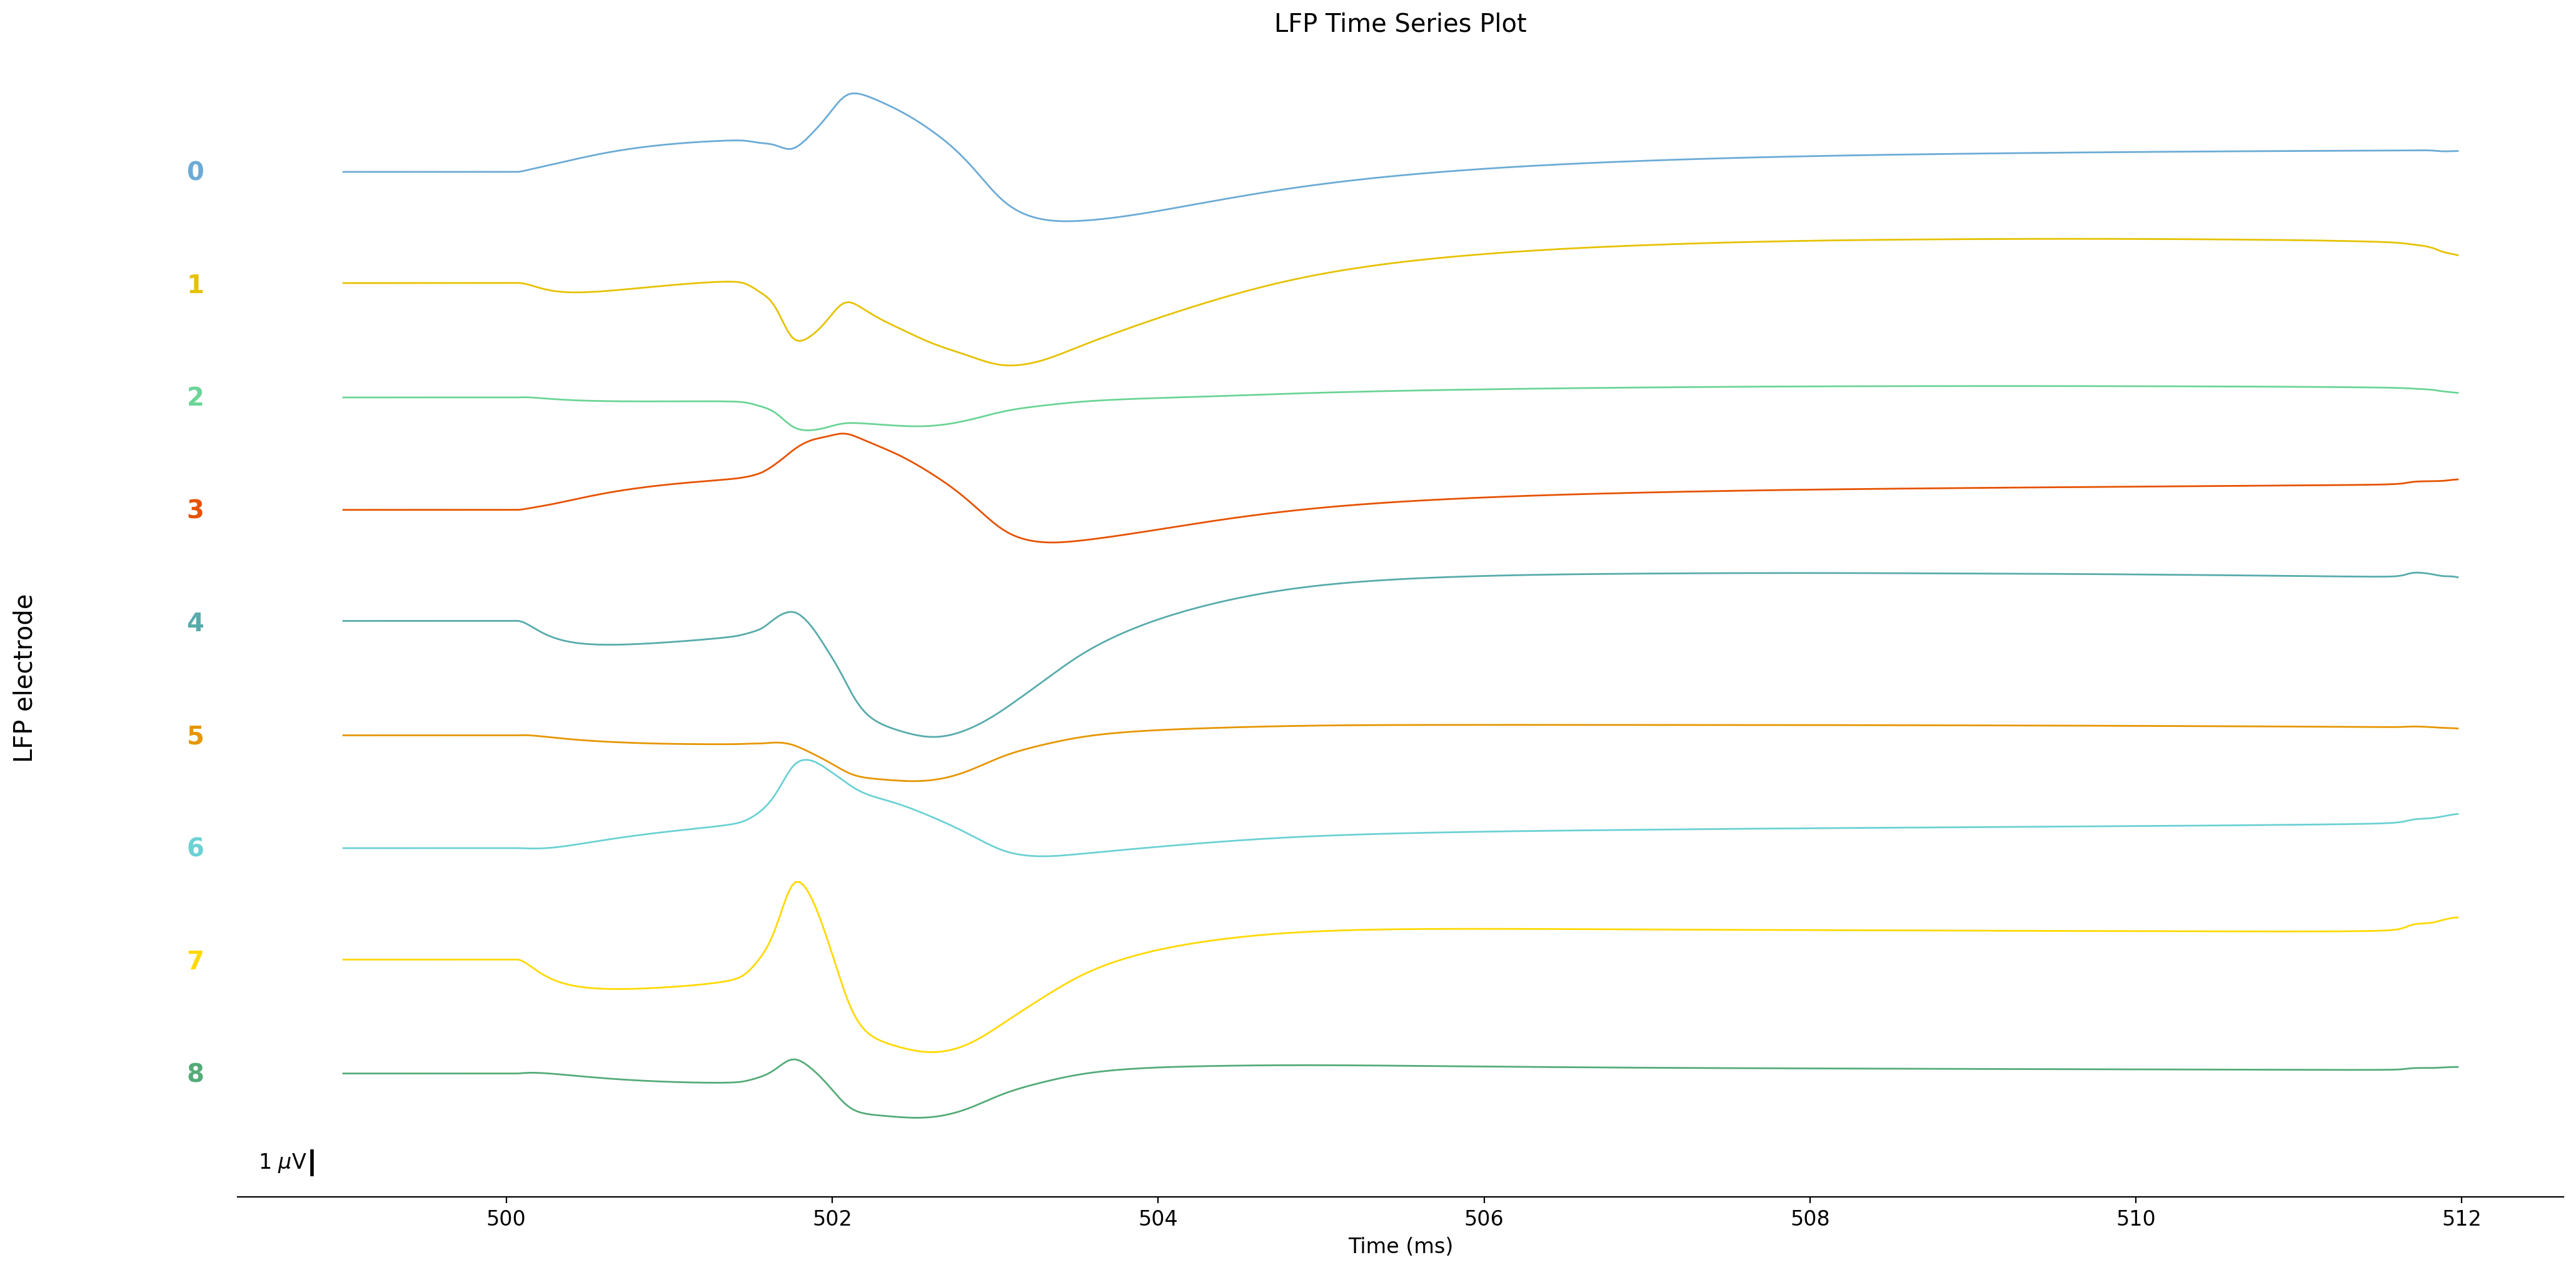

In [19]:
sim.analysis.plotTraces(include= [ii for ii in range(1)], timeRange=[497.5,513], ylim=[-120,50], axis=True, overlay=True, oneFigPer='cell', figSize=(24,4.5));
sim.analysis.plotLFP(electrodes=[ii for ii in range(len(cfg.recordLFP))], timeRange=[499,512], plots=['timeSeries'], figSize=(24,12.0))

Plotting 2D representation of network cell locations and connections...


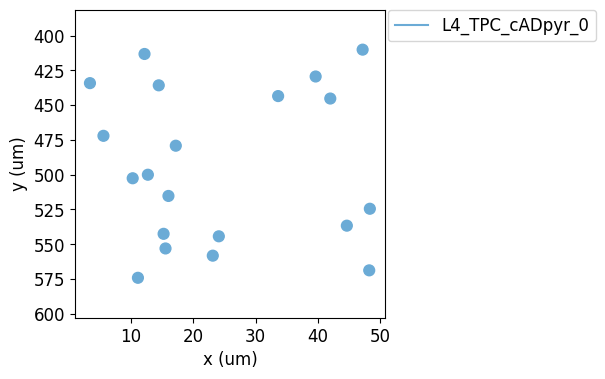

In [20]:
sim.analysis.plot2Dnet(include=['L4_TPC_cADpyr_0'], figSize=(4,4));

Plotting LFP electrode locations...
Plotting 3D cell shape ...


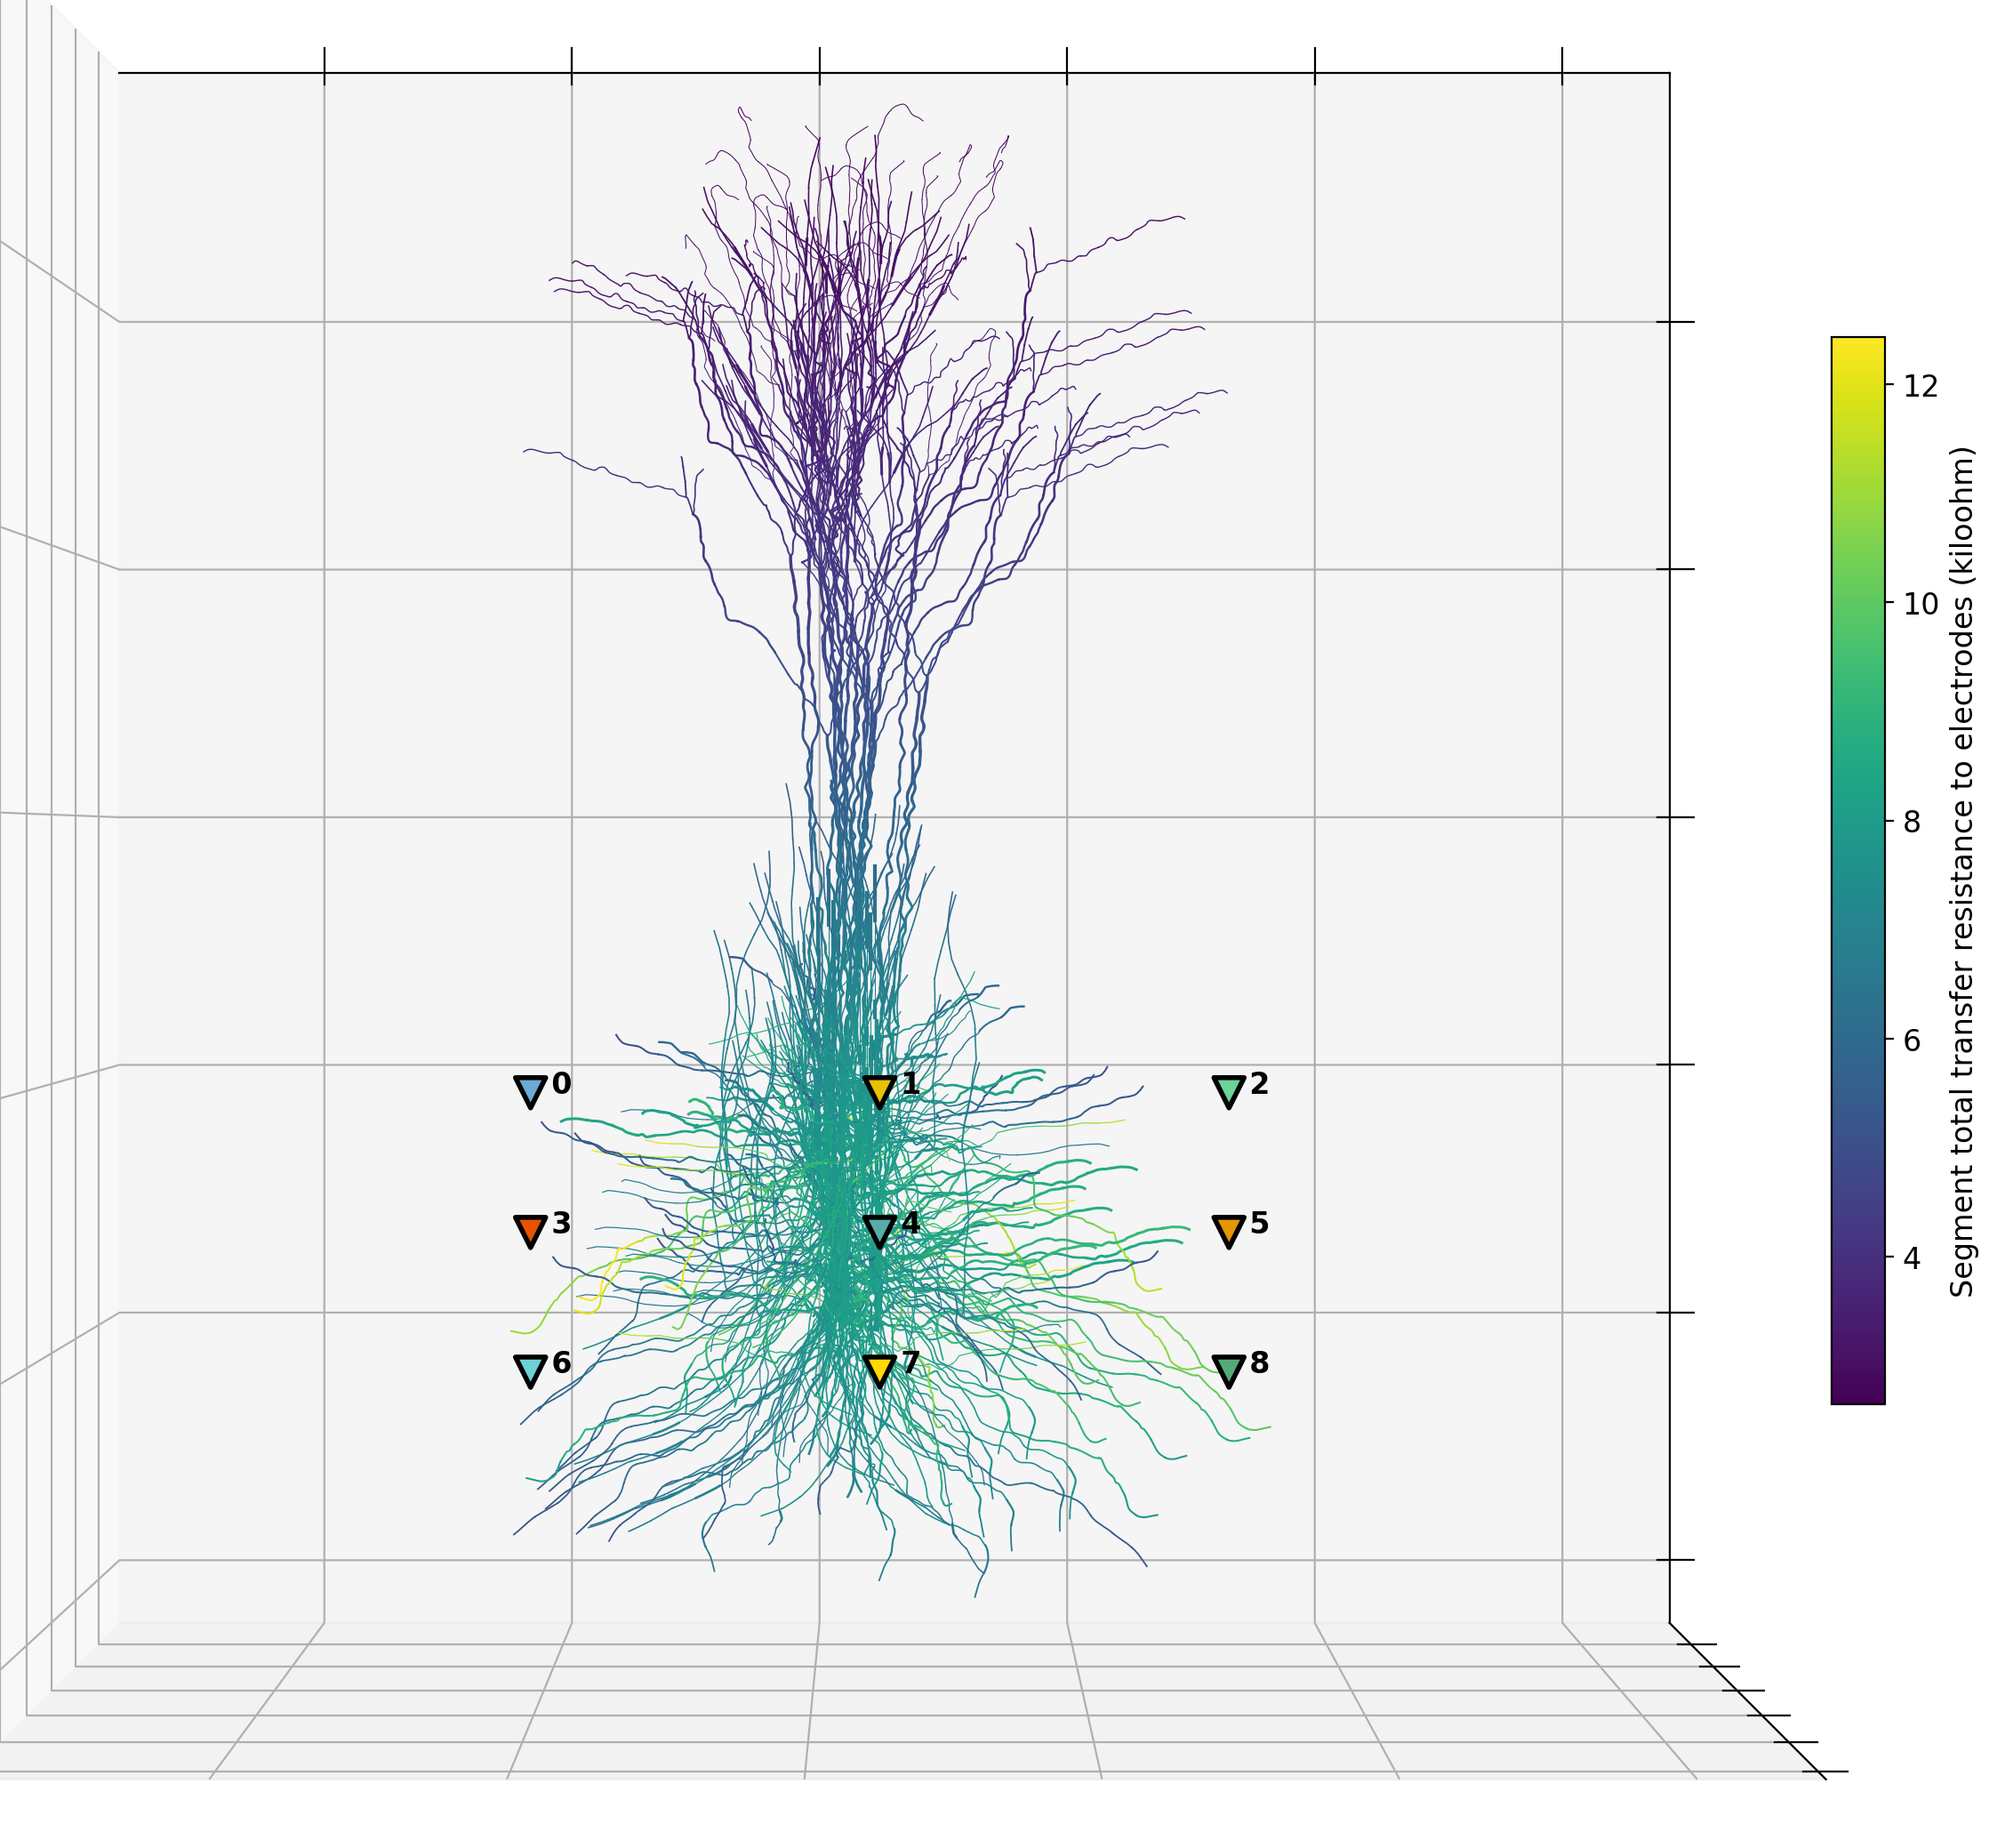

In [21]:
sim.analysis.plotLFP(electrodes=[3], timeRange=[299,304], plots=['locations'], figSize=(12,12.0))

Preparing LFP data...
Plotting LFP time series...


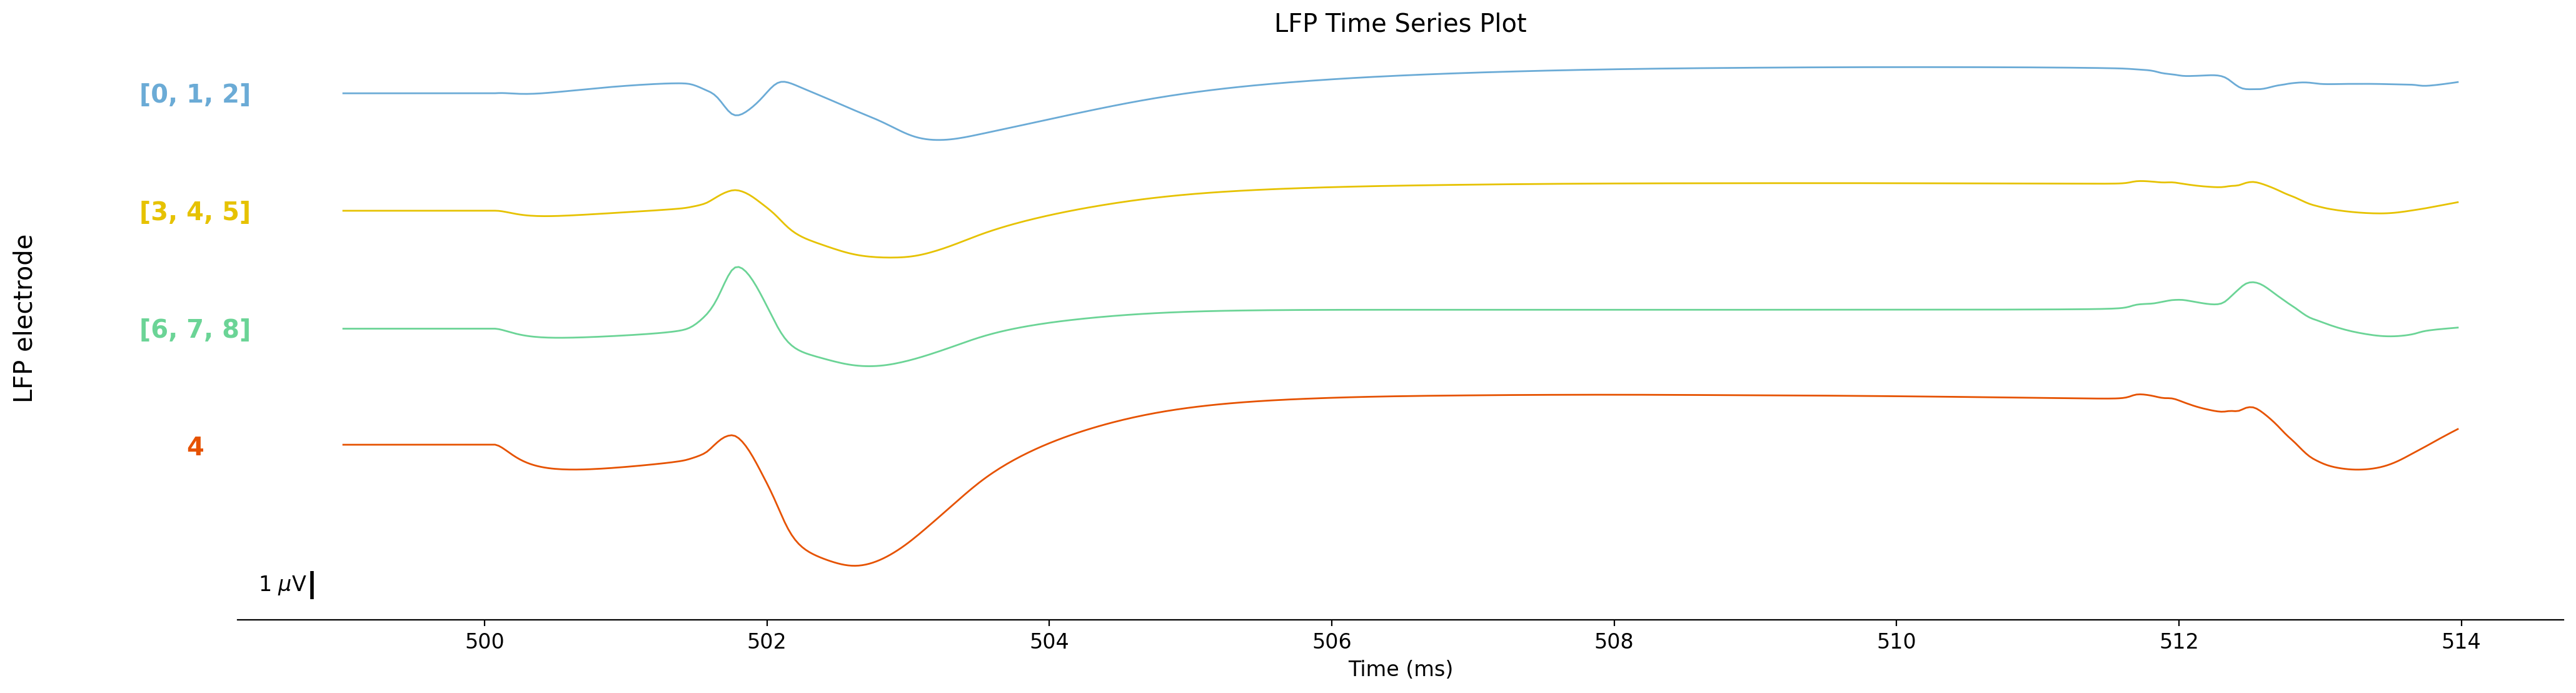

In [22]:
sim.analysis.plotLFP(electrodes=[[0,1,2], [3,4,5], [6,7,8], 4], timeRange=[499,514], plots=['timeSeries'], figSize=(24,6.0))

Plotting 3D cell shape ...
Plotting 3D cell shape ...


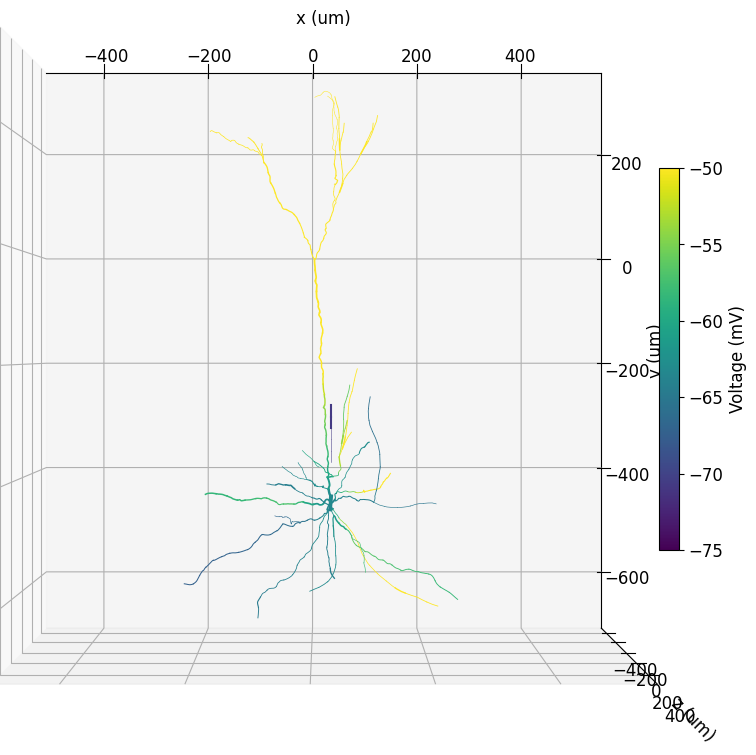

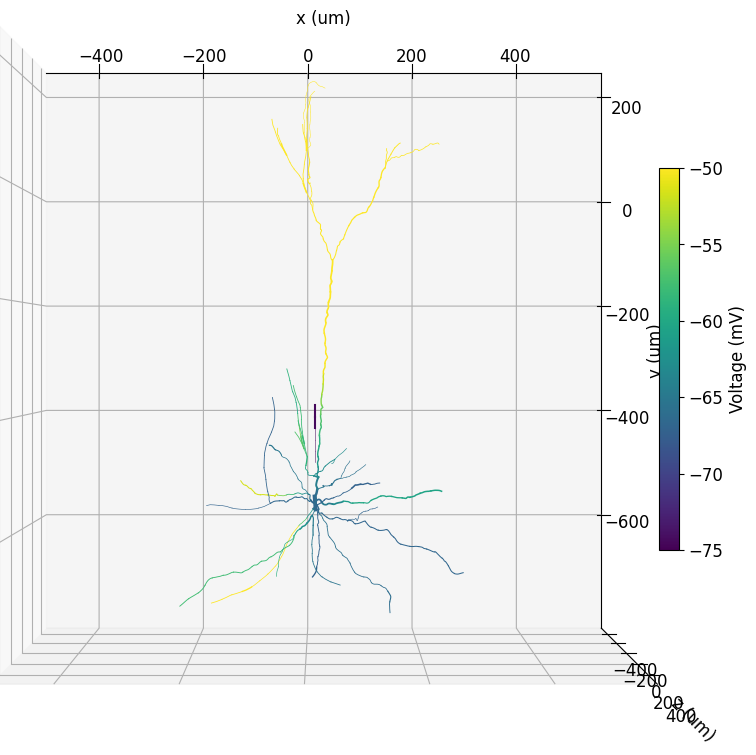

In [23]:
for ii in range(2):    
    sim.analysis.plotShape(includePre= [ii], includePost= [ii], 
        includeAxon=False, showSyns=False, showElectrodes=False,
        cvar= 'voltage', dist=0.6, elev=90, azim=-90, 
        axisLabels=True, synStyle='o', 
        clim= [-75, -50], showFig=False, synSize=2, saveFig=False, figSize=(8,8))